In [1]:
# Load packages
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.local_polynomial import LocalPolynomial
from FDApy.bandwidth import Bandwidth
from FDApy.basis import *
from FDApy.plot import *
from FDApy.utils import *

# Generate UnivariateFunctionalData

In [2]:
values = np.empty(shape=(1000, 300))
for i in np.arange(1000):
    simu = Brownian(N=1, M=300, brownian_type='fractional')
    simu.new(x0=0, hurst=0.5)
    noise = np.random.normal(0, 0.1, size=len(simu.obs_.argvals[0]))
    values[i, :] = simu.obs_.values[0] + noise

In [3]:
argvals = np.linspace(0, 1, 300)
uni_fun = UnivariateFunctionalData(argvals, values)
uni_fun

Univariate Functional data objects with 1000 observations of 1-dimensional support
argvals:
	0.0, 0.0033444816053511705, ... , 1.0	(300 sampling points)
values:
	array of size (1000, 300)

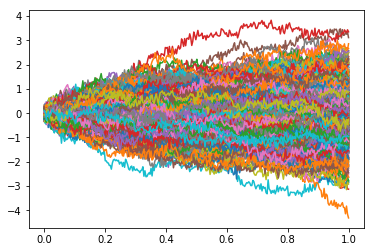

In [4]:
plot(uni_fun)
plt.show()

In [5]:
uni_fun_smooth = uni_fun.smooth(t0=0.5, k0=14)

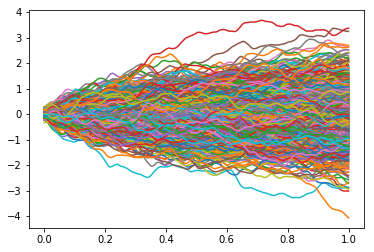

In [6]:
plot(uni_fun_smooth)
plt.show()

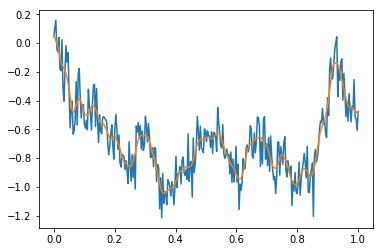

In [9]:
# Plot individual curves
idx = 5
fig, ax = plt.subplots(1, 1)
ax.plot(uni_fun.argvals[0], uni_fun.values[idx,:])
ax.plot(uni_fun_smooth.argvals[idx], uni_fun_smooth.values[idx])
plt.show()